# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Karen Rodriguez Pinto
- Enlin Wei
- Yumi Minami 
- Kanami Hannah Tanaka

# Group Members IDs

- A15161856
- A12938737
- A12669124
- A########

# Research Question

*Fill in your research question here*

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
# imports
%matplotlib inline

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# loads Kickstarters data into dataframe
df_kickstarters = pd.read_csv("Kickstarter_projects_Feb19.csv")

# Data Cleaning

We first checked to see if any cell has null values, and if so to drop those entries.

In [3]:
df_kickstarters[df_kickstarters.isnull().any(axis=1)]

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,state,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged


We found no null values in the dataset, and so we proceeded with data cleaning.

We first dropped the column 'id' since it gives no useful information, just an ID associated with the project. We then dropped columns 'start_month' and 'end_month' since the information about the start and end months of the projects are already given in the dates in the 'launched_at' and 'deadline' columns and so is redundant.

In [4]:
df_kickstarters.drop(columns=['id', 'start_month', 'end_month'], inplace=True)

We then noticed that the **launched_at** and **deadline** columns contained strings which represented dates and times. It would be easier to work with datetime objects, so we created two new columns to replace the old ones with datetime objects instead of string representations of dates and times. We first created the new columns, then deleted the old ones and renamed the new columns to the names of the old ones because replacing in place took too long for the code to run.

In [5]:
# method to convert datetime strings in 'df_kickstarters' into datetime objects
def to_datetime(datetime_str):
    return dt.datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

In [6]:
# converts all datetime strings in df to datetime objects and adds them to new lists
# this step may take a while since there are almost 200,000 entries
launched_at_dt_format = []
deadline_dt_format = []
for i in range(0,len(df_kickstarters)):
    launched_at_dt_format.append(to_datetime(df_kickstarters.iloc[i]['launched_at']))
    deadline_dt_format.append(to_datetime(df_kickstarters.iloc[i]['deadline']))

In [7]:
# adds these lists to the dataframe
df_kickstarters['launched_at_dt_format'] = launched_at_dt_format
df_kickstarters['deadline_dt_format'] = deadline_dt_format

In [8]:
# drops the original 'launched_at' and 'deadline' columns since they are now redundant
df_kickstarters.drop(columns=['launched_at', 'deadline'], inplace=True)

In [9]:
# renames the new columns to the old names
df_kickstarters.rename(columns={'launched_at_dt_format':'launched_at', 'deadline_dt_format':'deadline'}, inplace=True)

Finally, we noticed some of the monetary amounts have more than 2 decimal places, which should be cleaned up since we don't work with monetary amounts more specific than 2 decimal places. So we decided to round the amounts to 2 decimal places.

In [10]:
df_kickstarters['goal_usd'] = df_kickstarters['goal_usd'].round(2)
df_kickstarters['usd_pledged'] = df_kickstarters['usd_pledged'].round(2)

# Data Analysis & Results

Since our project aims to analyze which factor is most important for the success of kickstarters, we will divide the dataframe into two separate ones, one with all the successful projects and one with all the failed projects.

In [11]:
df_successful = df_kickstarters[df_kickstarters['status']=='successful']
df_failed = df_kickstarters[df_kickstarters['status']=='failed']

In [12]:
# views first rows of df_kickstarters
df_kickstarters.head()

,name,currency,main_category,sub_category,duration,goal_usd,city,state,country,blurb_length,name_length,status,start_Q,end_Q,usd_pledged,launched_at,deadline
0,Socks of Speed and Socks of Elvenkind,USD,games,Tabletop Games,16.0,2000.0,Menasha,WI,US,14,7,successful,Q4,Q4,6061.00,2018-10-30 20:00:02,2018-11-15 17:59:00
1,Power Punch Boot Camp: An All-Ages Graphic Novel,GBP,comics,Comic Books,30.0,3871.0,Shepperton,England,GB,24,8,successful,Q3,Q3,3914.51,2018-08-06 10:00:43,2018-09-05 10:00:43
2,"Live Printing with SX8: ""Squeegee Pulp Up""",USD,fashion,Apparel,30.0,1100.0,Manhattan,NY,US,21,7,successful,Q2,Q3,1110.00,2017-06-09 15:41:03,2017-07-09 15:41:03
3,Lost Dog Street Band's Next Album,USD,music,Country & Folk,45.0,3500.0,Nashville,TN,US,15,6,successful,Q3,Q4,4807.00,2014-09-25 18:46:01,2014-11-10 06:00:00
4,"Qto-X, a Tiny Lantern",USD,technology,Gadgets,60.0,30000.0,Troy,MI,US,15,4,successful,Q4,Q1,40368.00,2016-11-28 16:35:11,2017-01-27 16:35:11


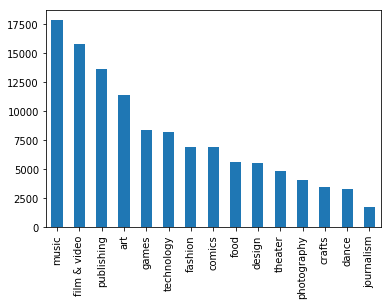

In [14]:
# plots histogram of column 'main category' of successful projects
df_successful['main_category'].value_counts().plot(kind='bar')

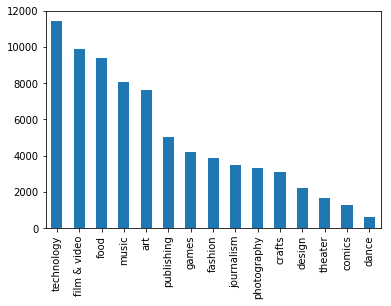

In [15]:
# plots histogram of column 'main category' of failed projects
df_failed['main_category'].value_counts().plot(kind='bar')

In [13]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*